# Análise da Adesão à Medicação

Utilizamos **PySpark** e **Matplotlib** para analisar a adesão à medicação em idosos. Após converter os dados booleanos, calculamos a **proporção de dias** em que cada idoso tomou medicação.

## Principais Insights
- **Taxa de Adesão:** Idosos seguem o tratamento em diferentes porcentagens.
- **Tendência Temporal:** A adesão varia ao longo dos meses.
- **Relação com Disposição:** Idosos mais ativos tendem a seguir melhor o tratamento.
- **Distribuição:** A maioria toma medicação regularmente, mas alguns apresentam baixa adesão.

## Conclusão
Os dados revelam padrões úteis para cuidadores e profissionais de saúde. Podemos expandir a análise com novos cruzamentos ou previsões! 


In [62]:
# Importando as bibliotecas
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, IntegerType, BooleanType, DateType
from pyspark.sql.functions import col, when, avg, month
import matplotlib.pyplot as plt

In [28]:
# Criando uma sessão Spark
spark = SparkSession.builder.appName("Data Analysis").getOrCreate()

In [41]:
# Carregando os dados
data = "data\\checklist_diario_idoso.csv"
df = spark.read.csv(data, header=True, inferSchema=True)

In [30]:
# Dando uma olhada dataset
df.show(8)

+--------------+--------+-----------+-------------+-----+------+-------------+------------+----------+-----+-----+---------+---------------+---------+
|data_checklist|id_idoso|id_cuidador|cafe_da_manha|fruta|almoco|suco_vitamina|lanche_tarde|disposicao|banho| sono|at_fisica|at_complementar|medicacao|
+--------------+--------+-----------+-------------+-----+------+-------------+------------+----------+-----+-----+---------+---------------+---------+
|    2025-01-05|       2|          4|            1|    0|     0|            1|           1|      true| true| true|     true|          false|     true|
|    2025-01-18|      17|          2|            0|    0|     0|            0|           0|     false|false| true|     true|          false|    false|
|    2025-05-06|      12|          2|            1|    1|     1|            1|           1|      true|false|false|     true|           true|     true|
|    2024-07-06|       1|          3|            0|    0|     0|            1|           1|   

In [42]:
# Tipo dos dados 
df.dtypes

[('data_checklist', 'date'),
 ('id_idoso', 'int'),
 ('id_cuidador', 'int'),
 ('cafe_da_manha', 'int'),
 ('fruta', 'int'),
 ('almoco', 'int'),
 ('suco_vitamina', 'int'),
 ('lanche_tarde', 'int'),
 ('disposicao', 'boolean'),
 ('banho', 'boolean'),
 ('sono', 'boolean'),
 ('at_fisica', 'boolean'),
 ('at_complementar', 'boolean'),
 ('medicacao', 'boolean')]

In [55]:
# Convertendo valores booleanos para inteiros (True -> 1, False -> 0)
df = df.withColumn("medicacao", when(col("medicacao") == True, 1).otherwise(0))
df = df.withColumn("disposicao", when(col("disposicao") == True, 1).otherwise(0))

In [56]:
# Calculando a proporção de adesão ao medicamento por idoso
df_med = df.groupBy("id_idoso").agg(avg("medicacao").alias("taxa_adesao")).orderBy("id_idoso")

In [57]:
# Convertendo para Pandas para visualização
pdf = df_med.toPandas()

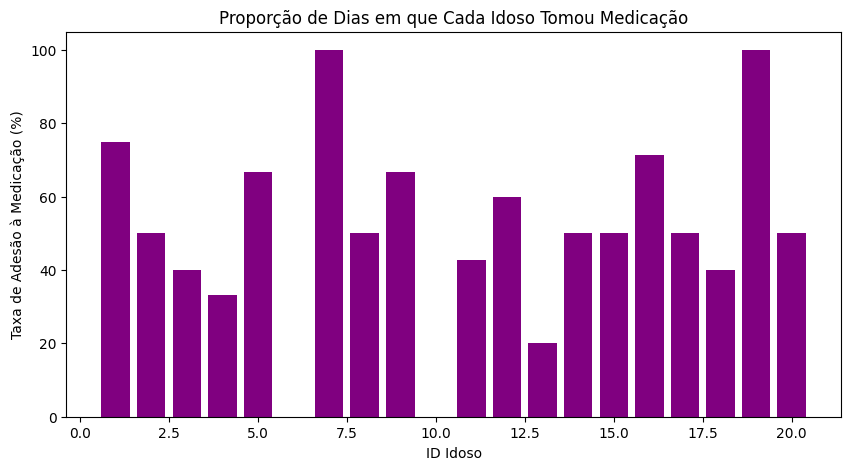

In [58]:
# Criando o gráfico
plt.figure(figsize=(10,5))
plt.bar(pdf["id_idoso"], pdf["taxa_adesao"] * 100, color="purple")  
plt.xlabel("ID Idoso")
plt.ylabel("Taxa de Adesão à Medicação (%)")
plt.title("Proporção de Dias em que Cada Idoso Tomou Medicação")
plt.show()

## Tendência Temporal da Adesão à Medicação dos Idosos

In [68]:
df = df.withColumn("mes", month("data_checklist"))
df_mes = df.groupBy("mes").agg(avg("medicacao").alias("taxa_adesao")).orderBy("mes")
pdf_mes = df_mes.toPandas()

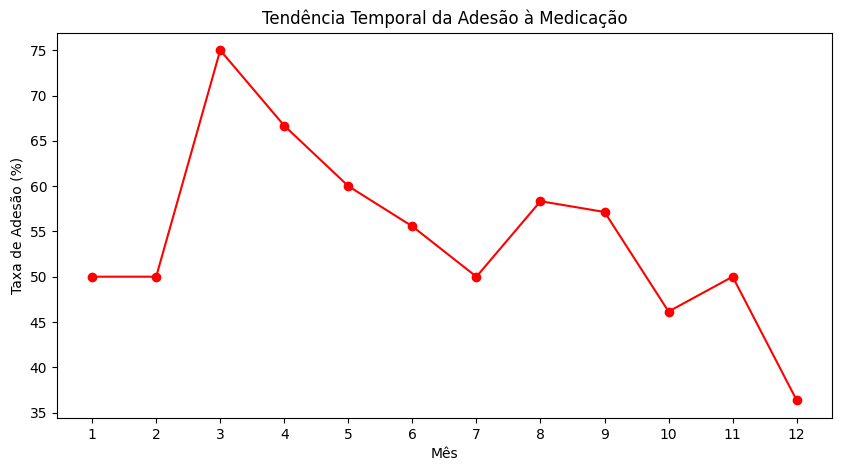

In [ ]:
# Criando a Figure
plt.figure(figsize=(10,5))
plt.plot(pdf_mes["mes"], pdf_mes["taxa_adesao"] * 100, marker="o", linestyle="-", color="red")
plt.xlabel("Mês")
plt.ylabel("Taxa de Adesão (%)")
plt.title("Tendência Temporal da Adesão à Medicação")
plt.xticks(range(1,13))
plt.show()

In [70]:
# Correlação entre disposição e medicação
df_disp_med = df.groupBy("disposicao").agg(avg("medicacao").alias("taxa_adesao"))
pdf_disp_med = df_disp_med.toPandas()

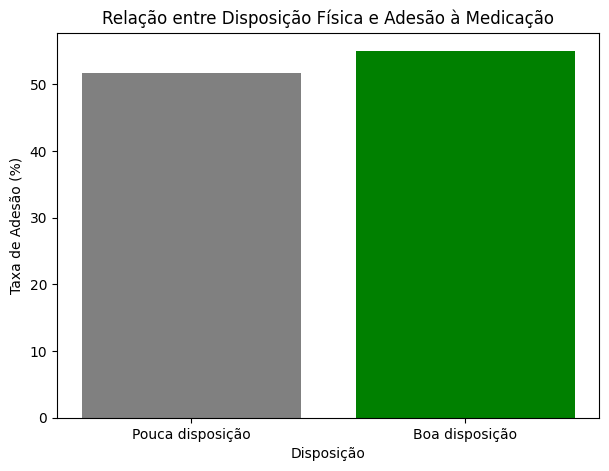

In [71]:
plt.figure(figsize=(7,5))
plt.bar(["Pouca disposição", "Boa disposição"], pdf_disp_med["taxa_adesao"] * 100, color=["gray", "green"])
plt.xlabel("Disposição")
plt.ylabel("Taxa de Adesão (%)")
plt.title("Relação entre Disposição Física e Adesão à Medicação")
plt.show()